The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

### Preparing the dataset 

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

In [3]:
import pandas as pd
df = pd.read_csv("car_fuel_efficiency.csv")
df=df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


### EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail? 


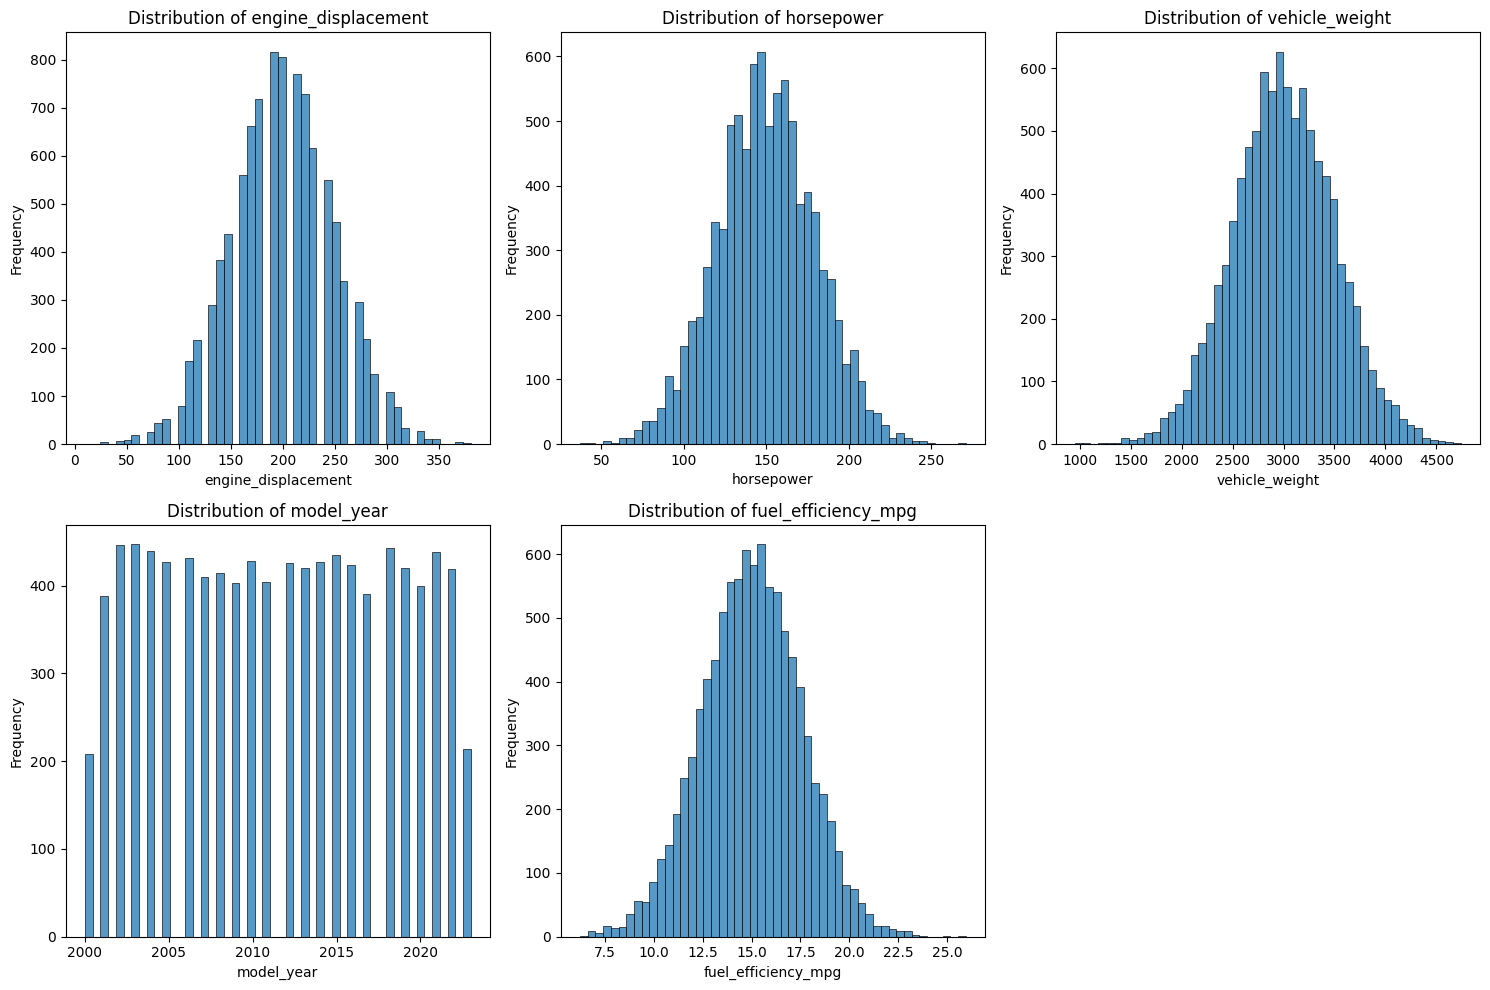

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

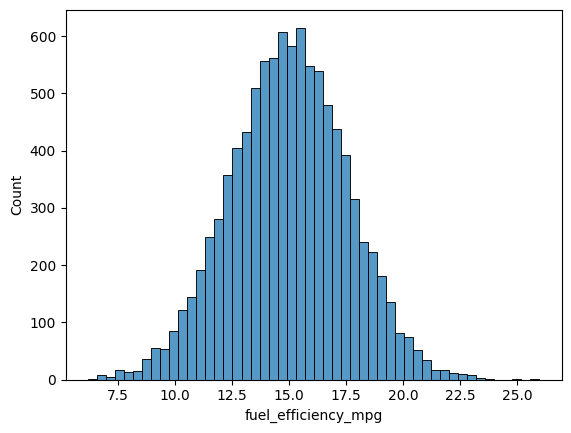

In [6]:
import seaborn as sns
sns.histplot(df.fuel_efficiency_mpg,bins=50)

### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`


In [7]:
import pandas as pd
for c in ['engine_displacement','horsepower','vehicle_weight','model_year']:
    print(c)
    print(df[c].isnull().sum())


engine_displacement
0
horsepower
708
vehicle_weight
0
model_year
0


##### Answer Question 1: column "horsepower"

### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199

In [8]:
df['horsepower'].median()


149.0

##### Answer Question 2: 149.0

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good


### MODEL 1 (with 0)

In [10]:
import numpy as np
def rmse(y, y_pred):
    error=y-y_pred
    se=error**2
    mse=se.mean()
    return np.sqrt(mse)

def train_linear_regression(X,y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]



df_model=df.copy()
df_model.loc[:,"horsepower"]=df_model["horsepower"].fillna(0)
n=len(df)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test
idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train=df_model.iloc[idx[:n_train]]
df_val=df_model.iloc[idx[n_train:n_train+n_val]]
df_test=df_model.iloc[idx[n_train+n_val:]]
X_train=df_train[['engine_displacement','horsepower','vehicle_weight','model_year']].values
y_train=df_train["fuel_efficiency_mpg"].tolist()
w0,w=train_linear_regression(X_train,y_train)
X_val=df_val[['engine_displacement','horsepower','vehicle_weight','model_year']].values
y_val=df_val["fuel_efficiency_mpg"].tolist()
y_pred=w0+X_val.dot(w)
rmse(y_val, y_pred),round(rmse(y_val, y_pred), 2)


(0.5173782638857467, 0.52)

### MODEL 2 (with mean)

In [13]:
def train_linear_regression(X,y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]


df_model=df.copy()
n=len(df)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test
idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train=df_model.iloc[idx[:n_train]]
df_model.loc[:,"horsepower"]=df_model["horsepower"].fillna(df_train["horsepower"].mean())

df_train=df_model.iloc[idx[:n_train]]
df_val=df_model.iloc[idx[n_train:n_train+n_val]]
df_test=df_model.iloc[idx[n_train+n_val:]]
X_train=df_train[['engine_displacement','horsepower','vehicle_weight','model_year']].values
y_train=df_train["fuel_efficiency_mpg"].tolist()
w0,w=train_linear_regression(X_train,y_train)
X_val=df_val[['engine_displacement','horsepower','vehicle_weight','model_year']].values
y_val=df_val["fuel_efficiency_mpg"].tolist()
y_pred=w0+X_val.dot(w)
rmse(y_val, y_pred),round(rmse(y_val, y_pred), 2)

(0.46359650423506327, 0.46)


##### Answer Question 3: Model 2 is better


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If multiple options give the same best RMSE, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [14]:
def train_linear_regression_reg(X,y,r):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    XTX=X.T.dot(X)
    XTX=XTX+r*np.eye(XTX.shape[0])
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

df = pd.read_csv("car_fuel_efficiency.csv")
df=df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]
df_model=df.copy()
df_model.loc[:,"horsepower"]=df_model["horsepower"].fillna(0)


n=len(df)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test
idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
   
    
df_train=df_model.iloc[idx[:n_train]]
df_val=df_model.iloc[idx[n_train:n_train+n_val]]
df_test=df_model.iloc[idx[n_train+n_val:]]
X_train=df_train[['engine_displacement','horsepower','vehicle_weight','model_year']].values
y_train=df_train["fuel_efficiency_mpg"].tolist()
X_val=df_val[['engine_displacement','horsepower','vehicle_weight','model_year']].values
y_val=df_val["fuel_efficiency_mpg"].tolist()
RMSE={}
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0,w=train_linear_regression_reg(X_train,y_train,r)

    y_pred=w0+X_val.dot(w)
    RMSE[r]=round(rmse(y_val, y_pred), 2),rmse(y_val, y_pred)
  
RMSE


{0: (0.52, 0.5173782638857467),
 0.01: (0.52, 0.5171115525767522),
 0.1: (0.52, 0.5187525130701821),
 1: (0.52, 0.5222348802092772),
 5: (0.52, 0.5228916092823478),
 10: (0.52, 0.5229812979636581),
 100: (0.52, 0.5230636233819926)}

##### Answer Question 4: 0.01

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.


In [16]:
df = pd.read_csv("car_fuel_efficiency.csv")
df=df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]
df_model=df.copy()
df_model.loc[:,'horsepower']=df_model['horsepower'].fillna(0)
df_model['model_year']=2023-df_model['model_year']

n=len(df)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test
idx=np.arange(n)
RMSE=[]
for x in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(x)
    np.random.shuffle(idx)
   
    
    df_train=df_model.iloc[idx[:n_train]]
    df_val=df_model.iloc[idx[n_train:n_train+n_val]]
    df_test=df_model.iloc[idx[n_train+n_val:]]
    X_train=df_train[['engine_displacement','horsepower','vehicle_weight','model_year']].values
    y_train=df_train['fuel_efficiency_mpg'].tolist()
    w0,w=train_linear_regression(X_train,y_train)
    X_val=df_val[['engine_displacement','horsepower','vehicle_weight','model_year']].values
    y_val=df_val['fuel_efficiency_mpg'].tolist()
    y_pred=w0+X_val.dot(w)
    RMSE.append(rmse(y_val, y_pred))
round(np.std(RMSE), 3)


0.006

##### Answer Question 5: 0.006

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5

In [20]:
n=len(df)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test
idx=np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
df_model=df.copy()
df_model.loc[:,'horsepower']=df['horsepower'].fillna(0)

df_trainval=df_model.iloc[idx[:n_train+n_val]]
df_test=df_model.iloc[idx[n_train+n_val:]]
X_train=df_trainval[['engine_displacement','horsepower','vehicle_weight','model_year']].values
y_train=df_trainval['fuel_efficiency_mpg'].tolist()
w0,w=train_linear_regression_reg(X_train,y_train,0.001)
X_val=df_test[['engine_displacement','horsepower','vehicle_weight','model_year']].values
y_val=df_test['fuel_efficiency_mpg'].tolist()
y_pred=w0+X_val.dot(w)
rmse(y_val, y_pred)



0.5156261299167999

##### Answer Question 6: 0.515